In [95]:
from sklearn.datasets import load_boston
import pandas as pd

In [96]:
boston = load_boston()

boston_df = pd.DataFrame(columns=boston.feature_names, data=boston.data)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [97]:
boston_df['target'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [98]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

plt.style.use(['dark_background', 'seaborn-deep'])

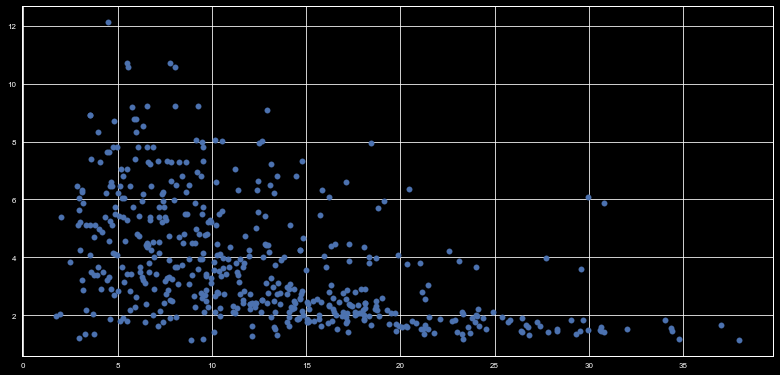

In [99]:
plt.figure(figsize=(12,6))
plt.scatter(x=boston_df.LSTAT, y=boston_df.DIS)

In [100]:
feature_X = boston_df[['LSTAT', 'DIS']]
feature_X

,LSTAT,DIS
0,4.98,4.0900
1,9.14,4.9671
2,4.03,4.9671
3,2.94,6.0622
4,5.33,6.0622
...,...,...
501,9.67,2.4786
502,9.08,2.2875
503,5.64,2.1675
504,6.48,2.3889


In [101]:
n = 3
model = KMeans(n_clusters=n)
model.fit(feature_X)
prediction = model.predict(feature_X)

feature_X['pred'] = prediction
feature_X


,LSTAT,DIS,pred
0,4.98,4.0900,0
1,9.14,4.9671,0
2,4.03,4.9671,0
3,2.94,6.0622,0
4,5.33,6.0622,0
...,...,...,...
501,9.67,2.4786,0
502,9.08,2.2875,0
503,5.64,2.1675,0
504,6.48,2.3889,0


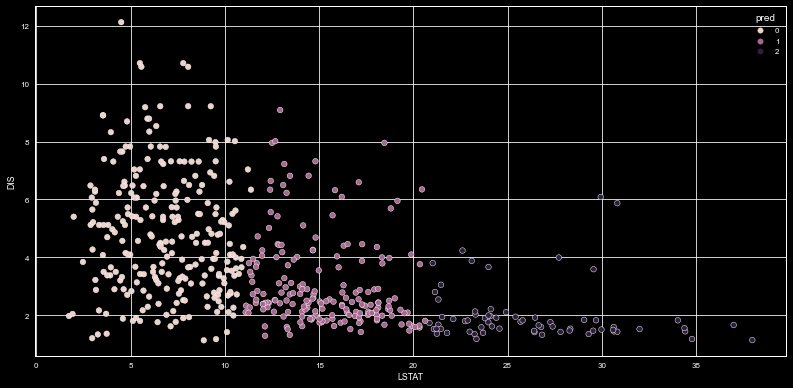

In [102]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(data=feature_X, x='LSTAT', y='DIS', hue='pred')
plt.show()